<a href="https://colab.research.google.com/github/Imran0897/Placement-Assignment_Md_Imran/blob/main/Python_06_Placement_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
#loading data from url
response = requests.get("https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json")
data = response.json()
# Convert the data to a pandas DataFrame
df = pd.DataFrame(data['pokemon'])

In [92]:
df.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,1.7,11:30,None,"[Fire, Ice, Flying, Psychic]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,25.3,08:45,[1.65],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.012,1.2,19:00,[1.79],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              151 non-null    int64  
 1   num             151 non-null    object 
 2   name            151 non-null    object 
 3   img             151 non-null    object 
 4   type            151 non-null    object 
 5   height          151 non-null    object 
 6   weight          151 non-null    object 
 7   candy           151 non-null    object 
 8   candy_count     70 non-null     float64
 9   egg             151 non-null    object 
 10  spawn_chance    151 non-null    float64
 11  avg_spawns      151 non-null    float64
 12  spawn_time      151 non-null    object 
 13  multipliers     70 non-null     object 
 14  weaknesses      151 non-null    object 
 15  next_evolution  70 non-null     object 
 16  prev_evolution  72 non-null     object 
dtypes: float64(3), int64(1), object(13)

Get all Pokemons whose spawn rate is less than 5%

In [94]:
# data with spawn_chance less that 5%
df_spawn_rate=df[(df["spawn_chance"]<0.05)]

In [95]:
df_spawn_rate_pokemon= df_spawn_rate[['name','spawn_chance']]

In [96]:
# resting index of data having spawn chance less than 5% 
df_spawn_rate_pokemon.reset_index(inplace=True)

In [97]:
# pokemons with less than 5% of spawn chance
df_spawn_rate_pokemon

,index,name,spawn_chance
0,1,Ivysaur,0.0420
1,2,Venusaur,0.0170
2,4,Charmeleon,0.0120
3,5,Charizard,0.0031
4,7,Wartortle,0.0340
...,...,...,...
60,145,Moltres,0.0000
61,147,Dragonair,0.0200
62,148,Dragonite,0.0011
63,149,Mewtwo,0.0000


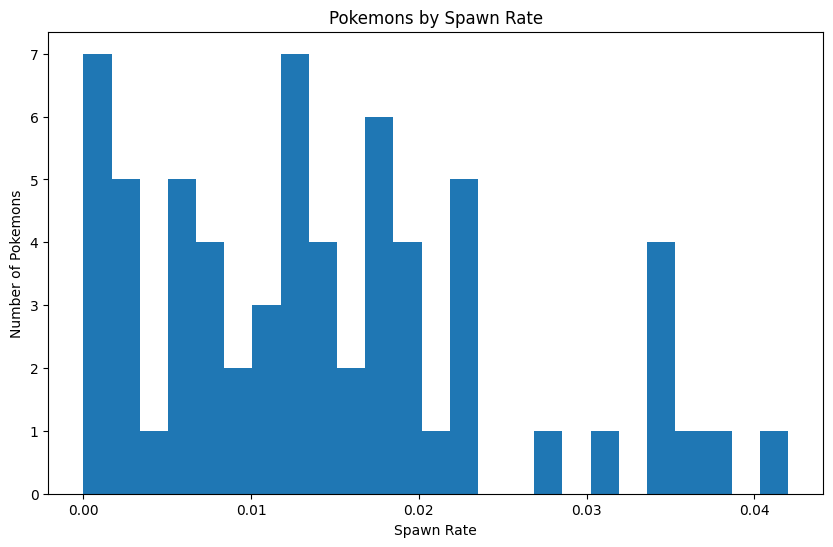

In [98]:
plt.figure(figsize=(10, 6))
df_spawn_rate['spawn_chance'].plot(kind='hist',bins=25)
plt.xlabel("Spawn Rate")
plt.ylabel("Number of Pokemons")
plt.title("Pokemons by Spawn Rate")
plt.show()

Get all Pokemons that have less than 4 weaknesses

In [99]:
# data with weakness less that 4
df_weakness = df[df['weaknesses'].apply(lambda x: len(x)) < 4]

In [100]:
# pokemon with weakness less that 4
df_weakness_pokemon = df_weakness[['name','weaknesses']]

In [101]:
df_weakness_pokemon

,name,weaknesses
3,Charmander,"[Water, Ground, Rock]"
4,Charmeleon,"[Water, Ground, Rock]"
5,Charizard,"[Water, Electric, Rock]"
6,Squirtle,"[Electric, Grass]"
7,Wartortle,"[Electric, Grass]"
...,...,...
145,Moltres,"[Water, Electric, Rock]"
146,Dratini,"[Ice, Dragon, Fairy]"
147,Dragonair,"[Ice, Dragon, Fairy]"
149,Mewtwo,"[Bug, Ghost, Dark]"


In [102]:
df_weakness

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,[1.65],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,[1.79],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"
5,6,006,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"[Fire, Flying]",1.70 m,90.5 kg,Charmander Candy,NaN,Not in Eggs,0.0031,0.31,13:34,None,"[Water, Electric, Rock]",NaN,"[{'num': '004', 'name': 'Charmander'}, {'num':..."
6,7,007,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,[Water],0.51 m,9.0 kg,Squirtle Candy,25.0,2 km,0.5800,58.00,04:25,[2.1],"[Electric, Grass]","[{'num': '008', 'name': 'Wartortle'}, {'num': ...",NaN
7,8,008,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,[Water],0.99 m,22.5 kg,Squirtle Candy,100.0,Not in Eggs,0.0340,3.40,07:02,[1.4],"[Electric, Grass]","[{'num': '009', 'name': 'Blastoise'}]","[{'num': '007', 'name': 'Squirtle'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"[Fire, Flying]",2.01 m,60.0 kg,None,NaN,Not in Eggs,0.0000,0.00,N/A,None,"[Water, Electric, Rock]",NaN,NaN
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,[Dragon],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"[1.83, 1.84]","[Ice, Dragon, Fairy]","[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,[Dragon],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,[2.05],"[Ice, Dragon, Fairy]","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]"
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,[Psychic],2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,N/A,None,"[Bug, Ghost, Dark]",NaN,NaN


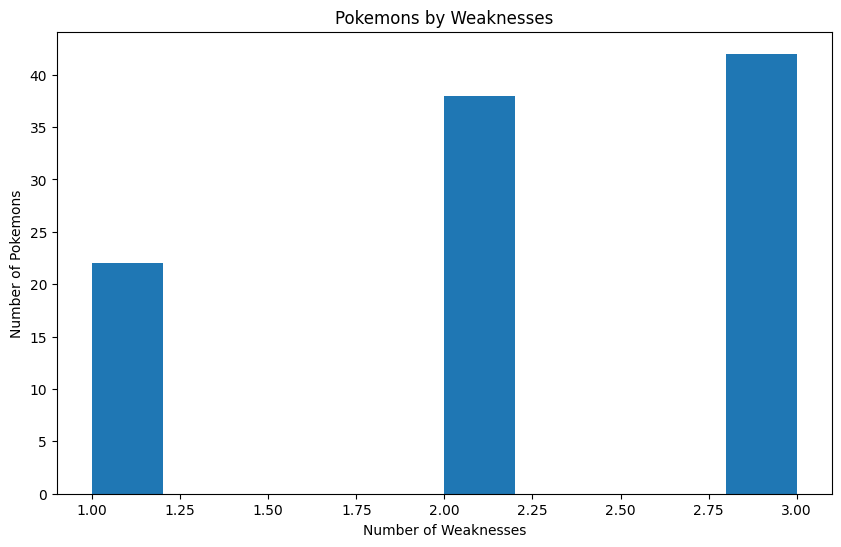

In [103]:
plt.figure(figsize=(10, 6))
df_weakness_pokemon['weaknesses'].apply(lambda x: len(x)).plot(kind='hist')
plt.xlabel("Number of Weaknesses")
plt.ylabel("Number of Pokemons")
plt.title("Pokemons by Weaknesses")
plt.show()

Get all Pokemons that have no multipliers at all

In [104]:
# creating new columns 
df['numner_of_multiplier']= df['multipliers'].apply(lambda x: len(x) if x != None else 0)

In [105]:
# pokemon with no multipliers at all
df_multipliers_pokemons = df[df['numner_of_multiplier']==0][['name','numner_of_multiplier']]

In [106]:
df_multipliers_pokemons

,name,numner_of_multiplier
2,Venusaur,0
5,Charizard,0
8,Blastoise,0
11,Butterfree,0
14,Beedrill,0
...,...,...
144,Zapdos,0
145,Moltres,0
148,Dragonite,0
149,Mewtwo,0


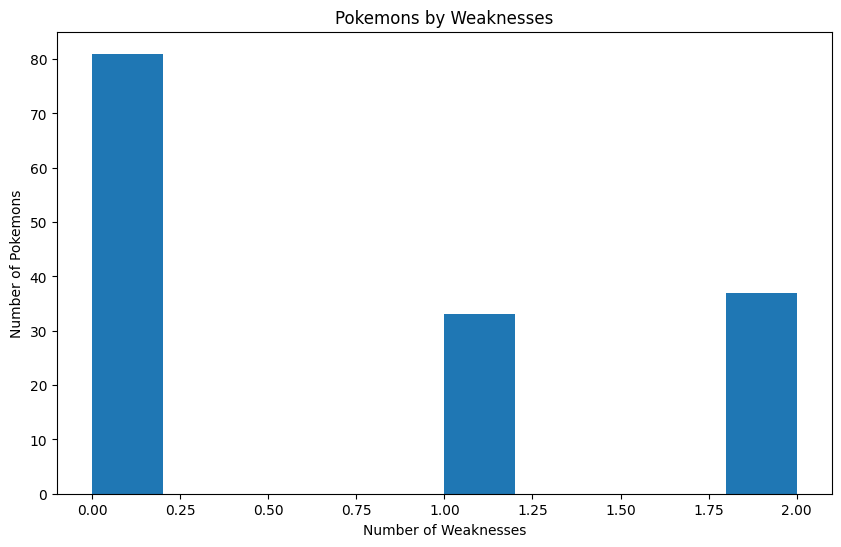

In [108]:
plt.figure(figsize=(10, 6))
df['numner_of_multiplier'].plot(kind='hist')
plt.xlabel("Number of Weaknesses")
plt.ylabel("Number of Pokemons")
plt.title("Pokemons by Weaknesses")
plt.show()

Get all Pokemons that do not have more than 2 evolutions

In [120]:
df[['next_evolution','prev_evolution']].head()

,next_evolution,prev_evolution
0,"[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,"[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,"[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,"[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"


In [114]:
# create new total evalution column
df['Total_evalution'] = df['next_evolution'].apply(lambda x : len(x) if isinstance(x, list) else 0) +  df['prev_evolution'].apply(lambda x : len(x) if isinstance(x, list) else 0)

In [121]:
df['Total_evalution']

0      2
1      2
2      2
3      2
4      2
      ..
146    2
147    2
148    2
149    0
150    0
Name: Total_evalution, Length: 151, dtype: int64

In [122]:
# pokemon with less than 2 evalution
df_total_evalution_2 = df[df['Total_evalution']<=2][['name','Total_evalution']]

In [123]:
df['Total_evalution'].value_counts()

1    77
2    48
0    25
3     1
Name: Total_evalution, dtype: int64

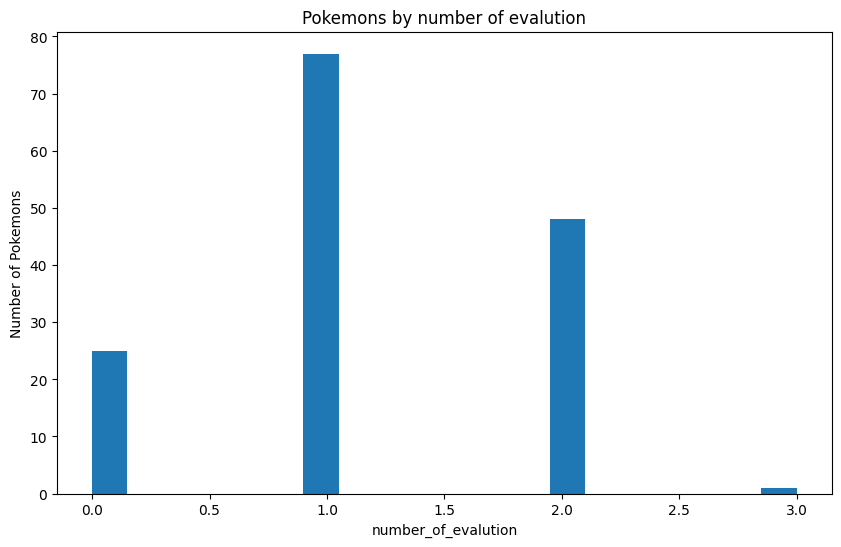

In [124]:
plt.figure(figsize=(10, 6))
df['Total_evalution'].plot(kind='hist', bins=20)
plt.xlabel("number_of_evalution")
plt.ylabel("Number of Pokemons")
plt.title("Pokemons by number of evalution")
plt.show()

Get all Pokemons whose spawn time is less than 300 seconds.

In [130]:
df["spawn_time_new_format"] = df['spawn_time'].apply(lambda x: ((int(x.split(':')[0]) if not x == 'N/A' else 0) * 60 + int(x.split(':')[0]) if not x == 'N/A' else 0))

In [132]:
# pokemons with less than 300 secs spawn time
df_pokemon_300=df[df["spawn_time_new_format"]<300][['name','spawn_time_new_format']]

In [133]:
df_pokemon_300

,name,spawn_time_new_format
6,Squirtle,244
8,Blastoise,0
10,Metapod,122
12,Weedle,122
13,Kakuna,122
...,...,...
143,Articuno,0
144,Zapdos,0
145,Moltres,0
149,Mewtwo,0


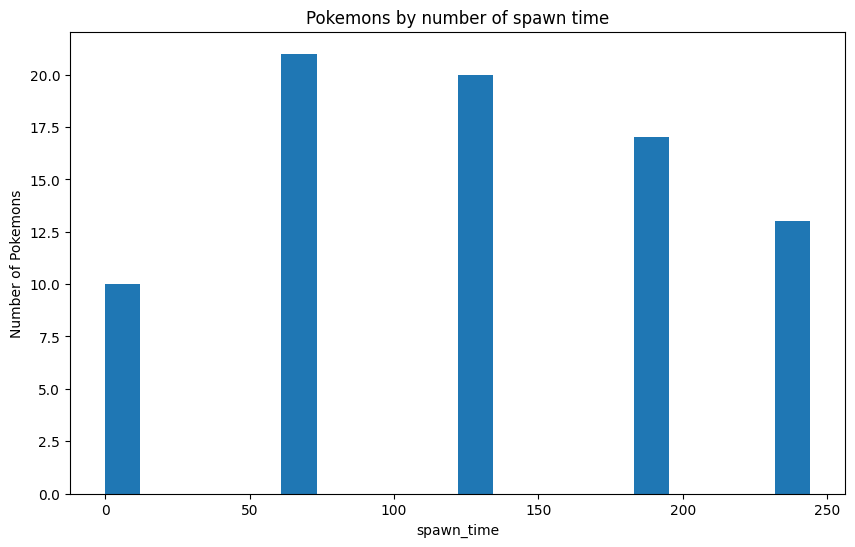

In [134]:
plt.figure(figsize=(10, 6))
df_pokemon_300['spawn_time_new_format'].plot(kind='hist', bins=20)
plt.xlabel("spawn_time")
plt.ylabel("Number of Pokemons")
plt.title("Pokemons by number of spawn time")
plt.show()

Get all Pokemon who have more than two types of capabilities

In [135]:
df.head()

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,numner_of_multiplier,Total_evalution,spawn_time_new_format
0,1,001,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"[Grass, Poison]",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.690,69.0,20:00,[1.58],"[Fire, Ice, Flying, Psychic]","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN,1,2,1220
1,2,002,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"[Grass, Poison]",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.042,4.2,07:00,"[1.2, 1.6]","[Fire, Ice, Flying, Psychic]","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",2,2,427
2,3,003,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"[Grass, Poison]",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.017,1.7,11:30,None,"[Fire, Ice, Flying, Psychic]",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",0,2,671
3,4,004,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,[Fire],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.253,25.3,08:45,[1.65],"[Water, Ground, Rock]","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN,1,2,488
4,5,005,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,[Fire],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.012,1.2,19:00,[1.79],"[Water, Ground, Rock]","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",1,2,1159


In [138]:
df[df['numner_of_multiplier']>2]

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,numner_of_multiplier,Total_evalution,spawn_time_new_format
